In [252]:
import pandas as pd

df_Dim_Students = pd.read_csv("Students_Information.csv")
df_Dim_University = pd.read_csv("University_Information.csv")
df_Dim_Time = pd.read_csv("Time_Information.csv")
df_Facts = pd.read_json("Facts.json")


df_Dim_Students = df_Dim_Students.set_index("ID_Student")
df_Dim_University = df_Dim_University.set_index("ID_University")
df_Dim_Time = df_Dim_Time.set_index("ID_Time")

df_Facts = df_Facts.set_index("Student_Id")
df_Facts = pd.merge(df_Facts, df_Dim_Students, how = "outer", left_index = True, right_index = True)

df_Facts = df_Facts.set_index("University_Id")
df_Facts = pd.merge(df_Facts, df_Dim_University, how = "outer", left_index = True, right_index = True)

df_Facts = df_Facts.set_index("Time_Id")
df_Facts = pd.merge(df_Facts, df_Dim_Time, how = "outer", left_index = True, right_index = True)

df_Facts = df_Facts.set_index("ID_Facts")

df_Facts
df_Facts[["First_Name", "Last_Name", "Gender", "Career", "Average", "University","Total_Students", "Date"]]

,First_Name,Last_Name,Gender,Career,Average,University,Total_Students,Date
ID_Facts,,,,,,,,
1,Briana,Castanares,Female,Database Administrator IV,86.78,Universidad de Guayaquil,6189,11/3/2022
2,Gerick,Febry,Male,VP Accounting,81.82,Odessa National Polytechnic University,7045,9/6/2022
3,Magdalene,Scardefield,Female,Staff Accountant II,69.68,"Universidad Pedagógica Nacional ""Francisco Mor...",9636,29/7/2022
4,Wynne,Muscroft,Female,Statistician II,89.70,"Islamic Azad University, Shirvan",8373,3/11/2021
5,Nicki,Abrahmson,Female,Financial Advisor,91.37,Caribbean University,8415,2/6/2022
6,Mickie,Thorley,Female,Paralegal,95.70,Chiang Mai Vocational College,7762,5/1/2022
7,Kora,Slott,Female,Human Resources Assistant I,72.65,Yunnan Normal University,5595,14/9/2022
8,Dinnie,Witcher,Female,VP Marketing,62.03,Moldova Technical University,1257,5/10/2021
9,Tarrance,Darke,Male,Systems Administrator III,77.47,Brock University,9474,18/3/2022


In [253]:
##¿Cual es el alumno que tiene el mayor promedio de todas las universidades registradas?
df_Facts[["First_Name","Last_Name","Career","University","Average"]][df_Facts.Average==df_Facts["Average"].max()]

,First_Name,Last_Name,Career,University,Average
ID_Facts,,,,,
19,Port,Archer,Internal Auditor,University of San Carlos,98.71


In [254]:
##¿Cuales son las universidades que tienen mayor afluencia de estudiantes en el extranjero?

df_Facts = df_Facts.sort_values(["Total_Students"], ascending=False)
df_Facts[["University", "Total_Students"]].head()

,University,Total_Students
ID_Facts,,
16,Dordt College,9671
3,"Universidad Pedagógica Nacional ""Francisco Mor...",9636
9,Brock University,9474
5,Caribbean University,8415
4,"Islamic Azad University, Shirvan",8373


In [354]:
##¿Cuál es el Top 3 de los mejores estudiantes de las universidades registradas y a qué carrera pertenecen?

df_Facts.sort_values(["Average"], ascending = False)[["First_Name","Last_Name","Career","Average", "University"]]. head(3)

,First_Name,Last_Name,Career,Average,University
ID_Facts,,,,,
19,Port,Archer,Internal Auditor,98.71,University of San Carlos
6,Mickie,Thorley,Paralegal,95.70,Chiang Mai Vocational College
17,Rhoda,Odams,Financial Advisor,92.34,The College of Wooster


<AxesSubplot:>

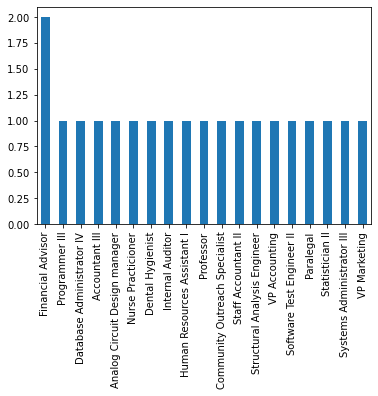

In [355]:
##¿Cuáles son las carreras más buscadas en las universidades extranjeras?
df_Facts["Career"].value_counts(ascending=False).plot(kind="bar")